age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df = df.drop([581])

In [10]:
df.shape

(1337, 7)

In [11]:
for col in df:
    print(f'unique value from {col}:')
    print(f'{df[col].unique()}')
    print('xx'*40)

unique value from age:
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
unique value from sex:
['female' 'male']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
unique value from bmi:
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98 

In [12]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


<AxesSubplot:xlabel='charges', ylabel='Density'>

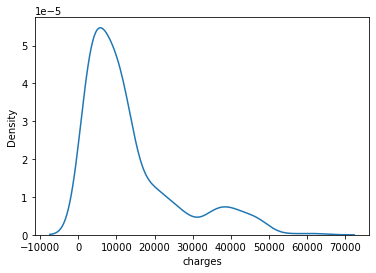

In [14]:
sns.kdeplot(data=df, x='charges')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('charges', axis=1)
y = df['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
dftrain = pd.concat([X_train, y_train], axis=1)

In [19]:
dftest = pd.concat([X_test, y_test],axis=1)

In [20]:
dftrain.shape

(935, 7)

In [21]:
dftrain.head(2)

,age,sex,bmi,children,smoker,region,charges
138,54,female,31.900,3,no,southeast,27322.73386
381,55,male,30.685,0,yes,northeast,42303.69215


In [22]:
dftest.shape

(402, 7)

In [23]:
dftest.head(2)

,age,sex,bmi,children,smoker,region,charges
900,49,male,22.515,0,no,northeast,8688.85885
1064,29,female,25.600,4,no,southwest,5708.86700


# EDA
### univariate

In [24]:
dftrain.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [25]:
num = ['age', 'bmi', 'charges']

In [26]:
obj = ['sex', 'smoker', 'region', 'children']

In [27]:
df['age'].value_counts()

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

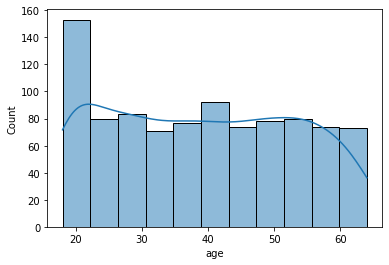

In [28]:
sns.histplot(data=dftrain, x='age', kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

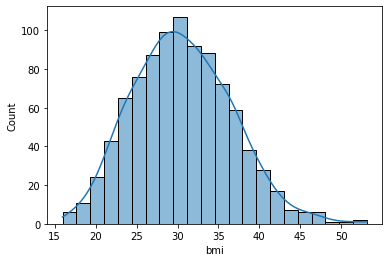

In [29]:
sns.histplot(data=dftrain, x='bmi', kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

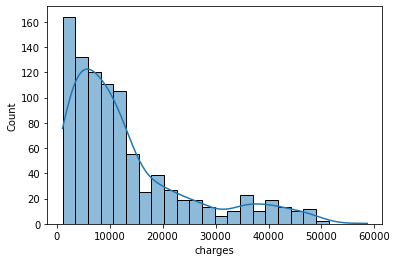

In [30]:
sns.histplot(data=dftrain, x='charges', kde=True)

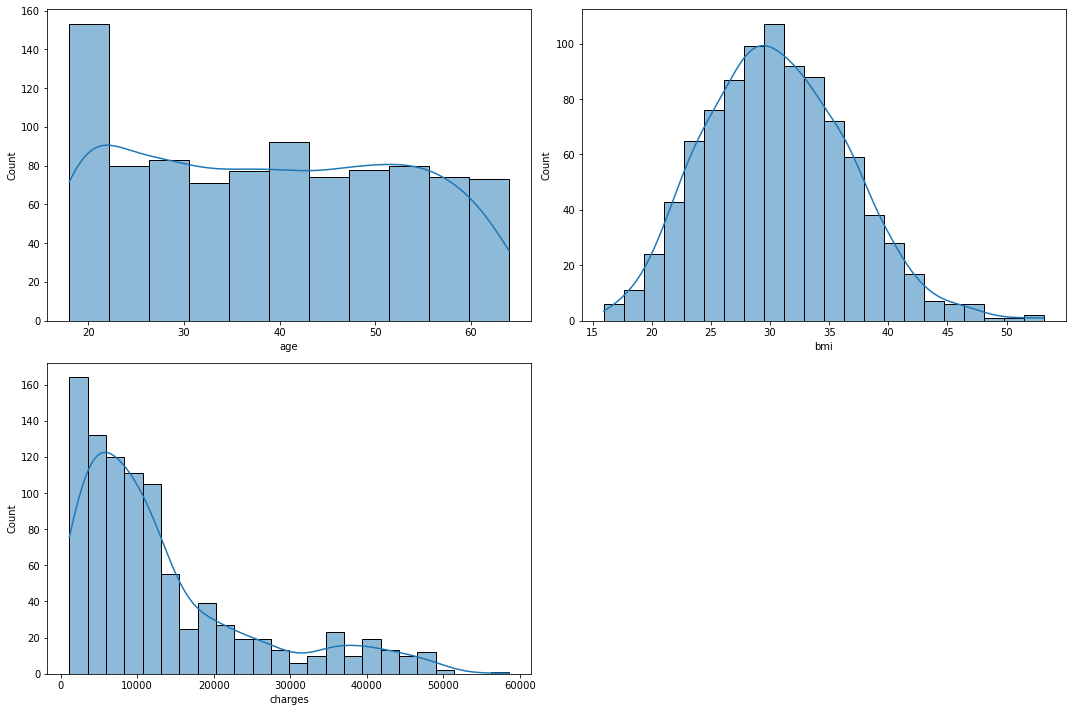

In [31]:
plt.figure(figsize=(15,10))
for x in range(0,len(num)):
    plt.subplot(2,2,x+1)
    sns.histplot(data=dftrain, x=dftrain[num[x]], kde=True)
plt.tight_layout()

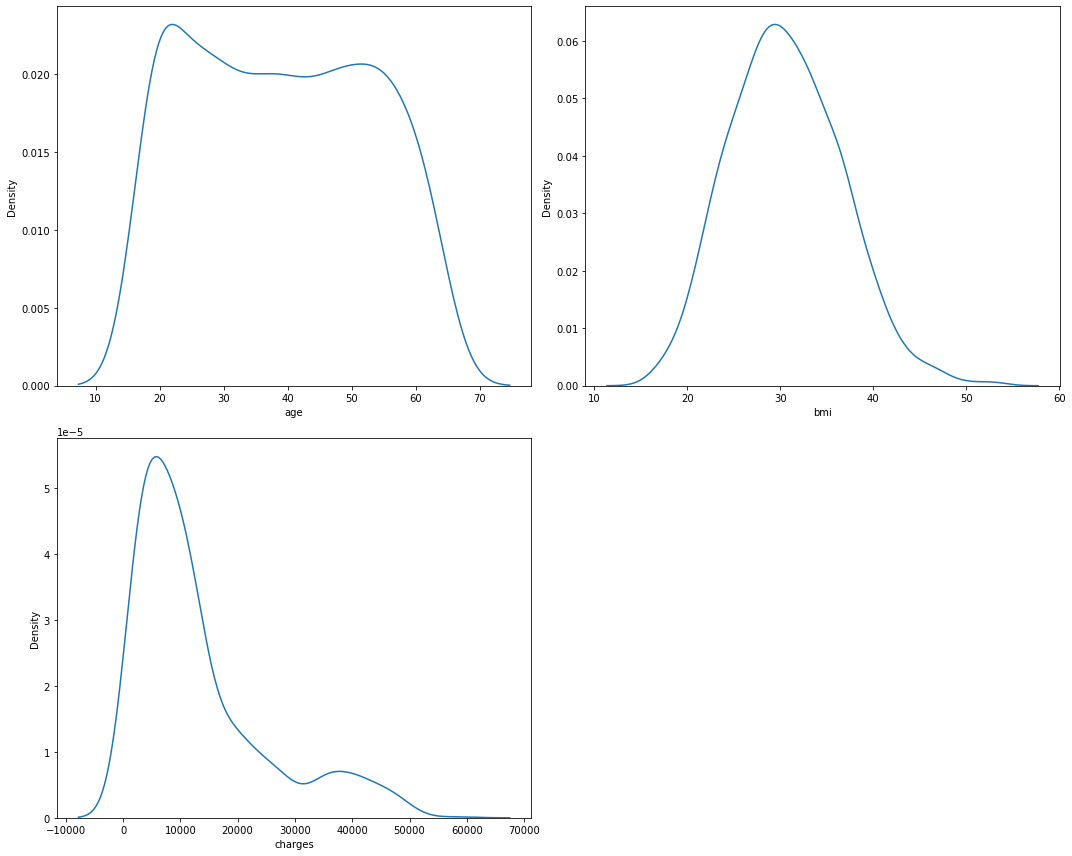

In [32]:
plt.figure(figsize=(15,12))
for x in range(0,len(num)):
    plt.subplot(2,2,x+1)
    sns.kdeplot(data=dftrain, x=dftrain[num[x]])
plt.tight_layout()

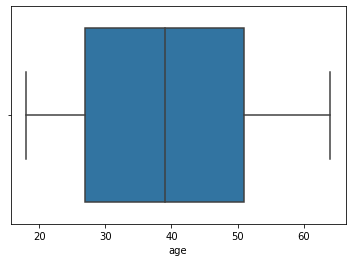

In [33]:
sns.boxplot(data=dftrain, x='age')
plt.show()

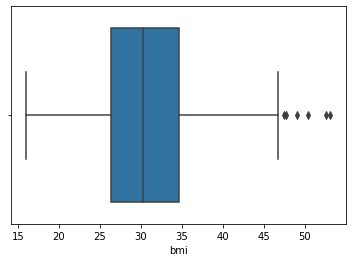

In [34]:
sns.boxplot(data=dftrain, x='bmi')
plt.show()

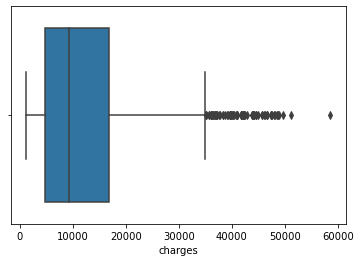

In [35]:
sns.boxplot(data=dftrain, x='charges')
plt.show()

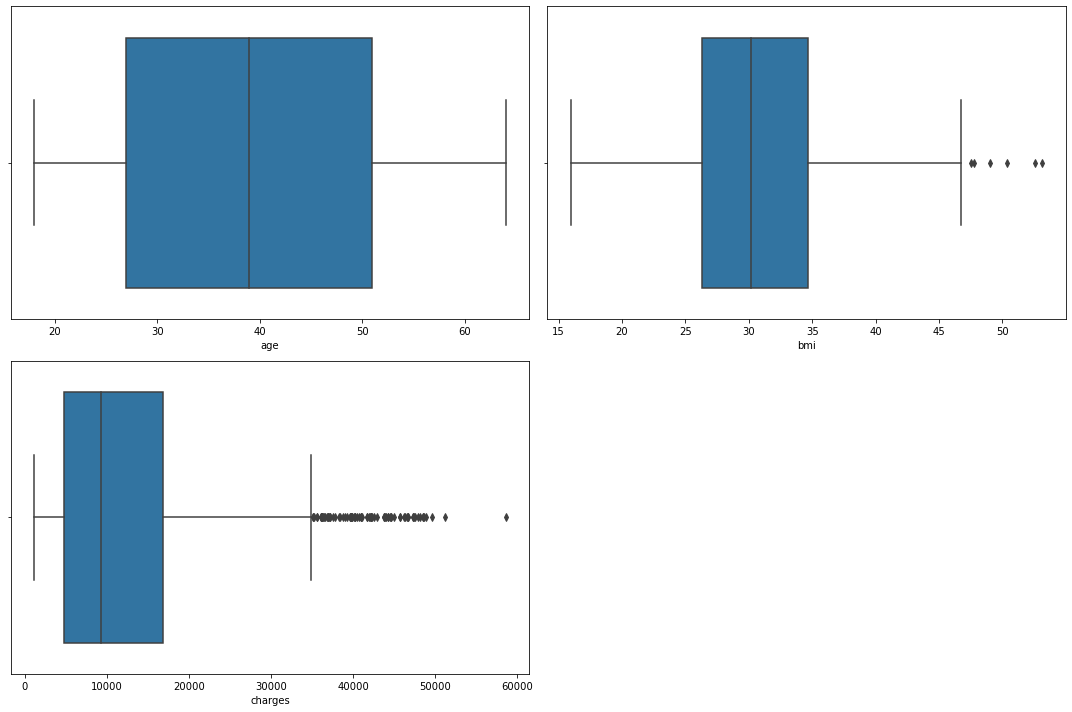

In [36]:
plt.figure(figsize=(15,10))
for x in range(0,len(num)):
    plt.subplot(2,2,x+1)
    sns.boxplot(data=dftrain, x=dftrain[num[x]])
plt.tight_layout()

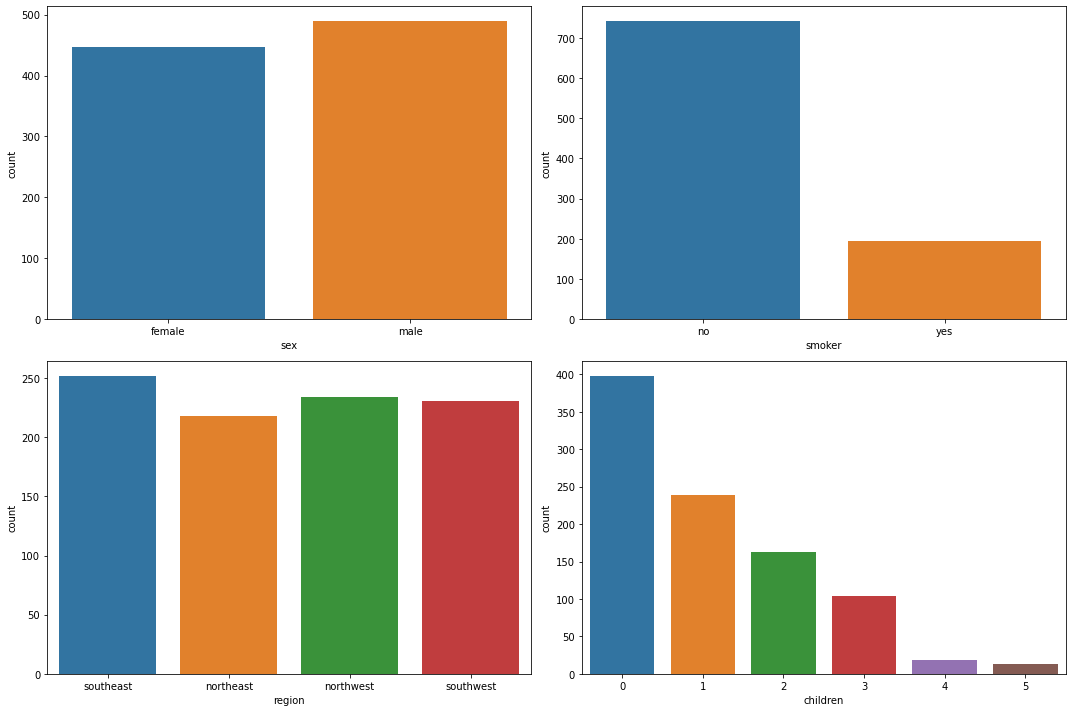

In [37]:
plt.figure(figsize=(15,10))
for x in range(0,len(obj)):
    plt.subplot(2,2,x+1)
    sns.countplot(data=dftrain, x=dftrain[obj[x]])
plt.tight_layout()

## bivariate

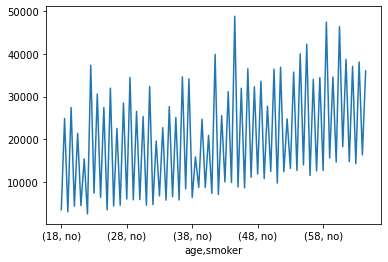

In [38]:
dftrain.groupby(['age','smoker'])['charges'].mean().plot(kind='line')
plt.show()

In [ ]:
df

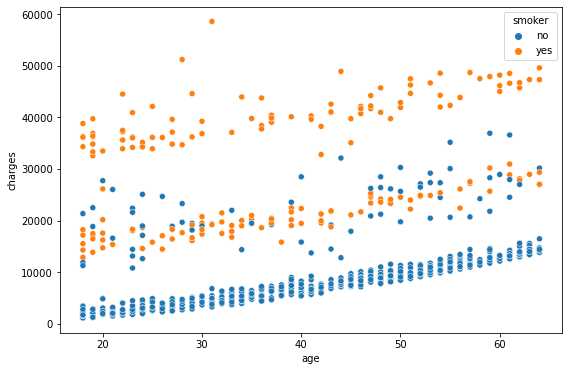

In [51]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=dftrain, x='age', y='charges', hue='smoker')
plt.show()

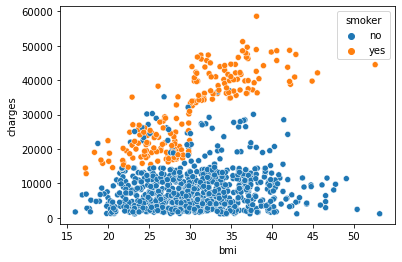

In [52]:
sns.scatterplot(data=dftrain, x='bmi', y='charges', hue='smoker')
plt.show()

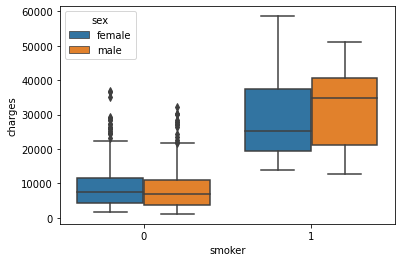

In [69]:
sns.boxplot(data=dftrain, x='smoker', y='charges', hue='sex')
plt.show()

In [53]:
a= dftrain[dftrain['smoker']=='yes']
b= dftrain[dftrain['smoker']=='no']

In [73]:
a.corr()

,age,bmi,children,charges
age,1.000000,0.002572,0.202884,0.336180
bmi,0.002572,1.000000,-0.043913,0.812002
children,0.202884,-0.043913,1.000000,0.068762
charges,0.336180,0.812002,0.068762,1.000000


In [55]:
dftrain.corr(method='spearman')

,age,bmi,children,charges
age,1.000000,0.106979,0.081633,0.514655
bmi,0.106979,1.000000,0.001798,0.090949
children,0.081633,0.001798,1.000000,0.149304
charges,0.514655,0.090949,0.149304,1.000000


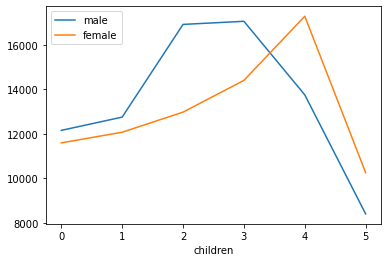

In [77]:
dftrain[dftrain['sex']=='male'].groupby('children')['charges'].mean().plot(kind='line',label='male')
dftrain[dftrain['sex']=='female'].groupby('children')['charges'].mean().plot(kind='line',label='female')
plt.legend()

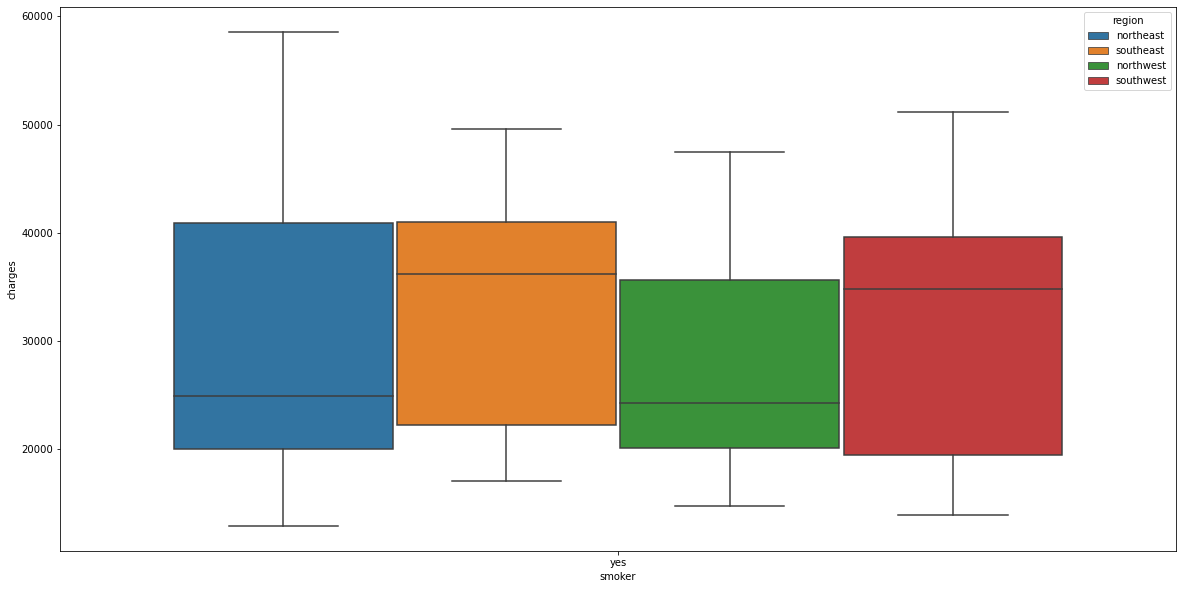

In [57]:
plt.figure(figsize=(20,10))
sns.boxplot(data=a, x='smoker', y='charges',hue='region')
plt.show()

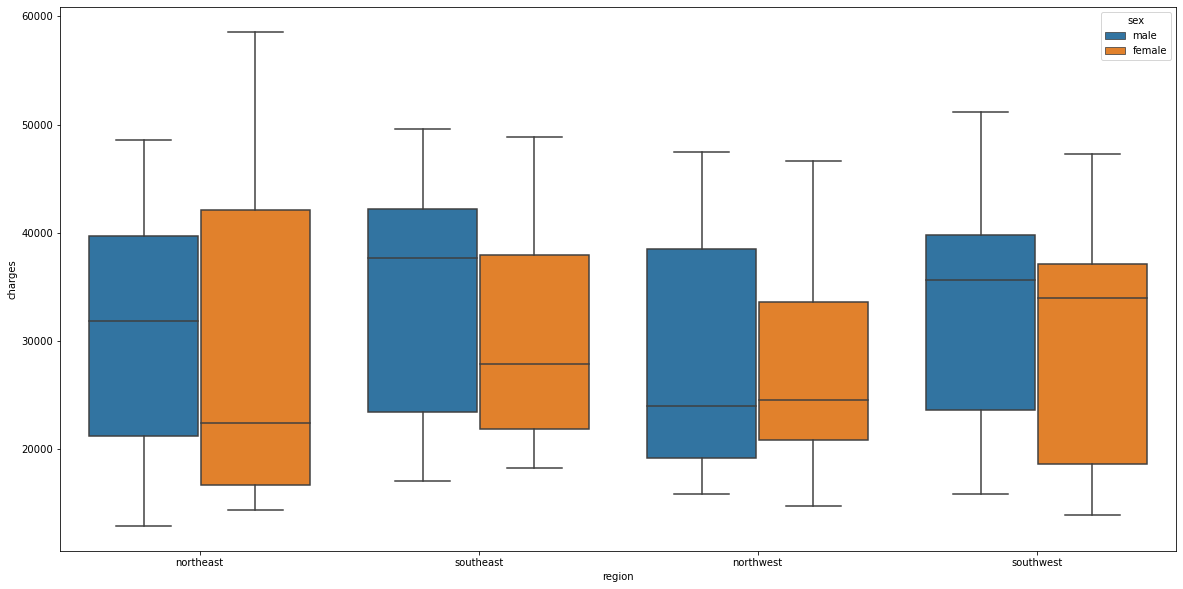

In [58]:
plt.figure(figsize=(20,10))
sns.boxplot(data=a, x='region', y='charges',hue='sex')
plt.show()

In [59]:
dftrain['smoker'] = dftrain['smoker'].replace(['yes', 'no'], [1,0]) 

In [60]:
dftrain.groupby('sex')['smoker'].mean()

sex
female    0.179372
male      0.233129
Name: smoker, dtype: float64

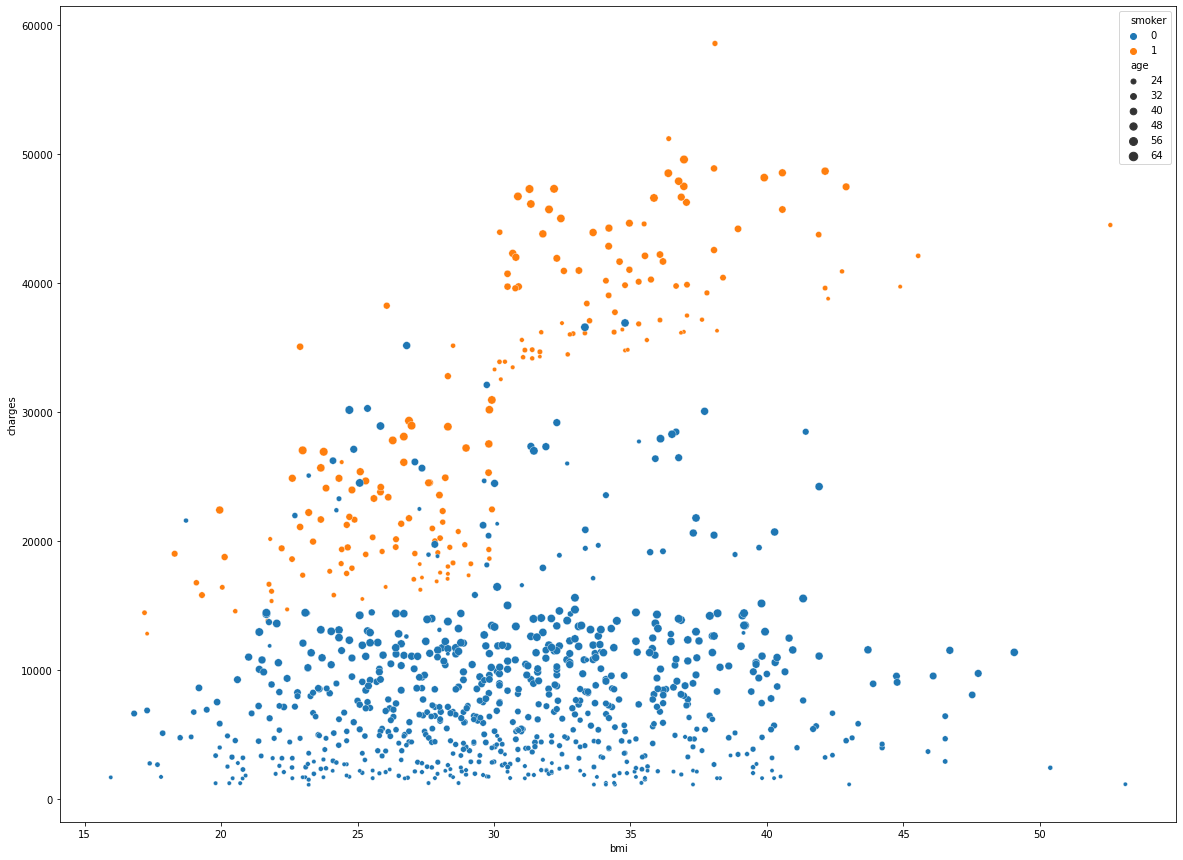

In [74]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=dftrain, x='bmi', y='charges',hue='smoker', size='age')
plt.show()

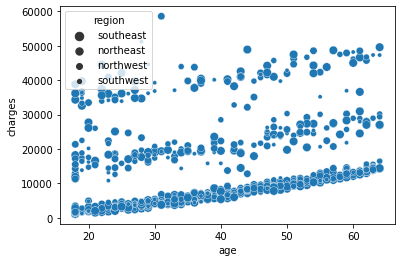

In [62]:

sns.scatterplot(data=dftrain, x='age', y='charges',size='region')
plt.show()

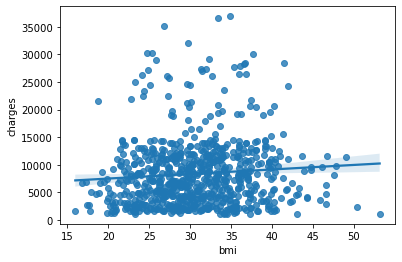

In [63]:
sns.regplot(data=b, x='bmi', y='charges')
plt.show()

In [64]:
dftrain.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.104126,0.064688,-0.046723,0.286756
bmi,0.104126,1.000000,-0.007878,-0.041391,0.160153
children,0.064688,-0.007878,1.000000,0.029978,0.096446
smoker,-0.046723,-0.041391,0.029978,1.000000,0.776046
charges,0.286756,0.160153,0.096446,0.776046,1.000000


In [65]:
dftrain.groupby('smoker')['bmi'].mean()

smoker
0    30.747058
1    30.132500
Name: bmi, dtype: float64

In [78]:
dftrain.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.104126,0.064688,-0.046723,0.286756
bmi,0.104126,1.000000,-0.007878,-0.041391,0.160153
children,0.064688,-0.007878,1.000000,0.029978,0.096446
smoker,-0.046723,-0.041391,0.029978,1.000000,0.776046
charges,0.286756,0.160153,0.096446,0.776046,1.000000


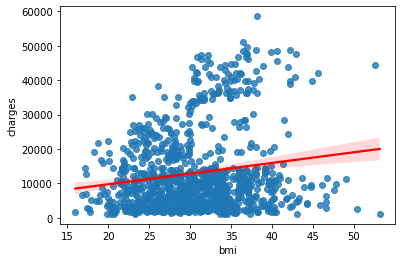

In [79]:
sns.regplot(data=dftrain, x='bmi', y='charges', line_kws={'color':'red'})
plt.show()

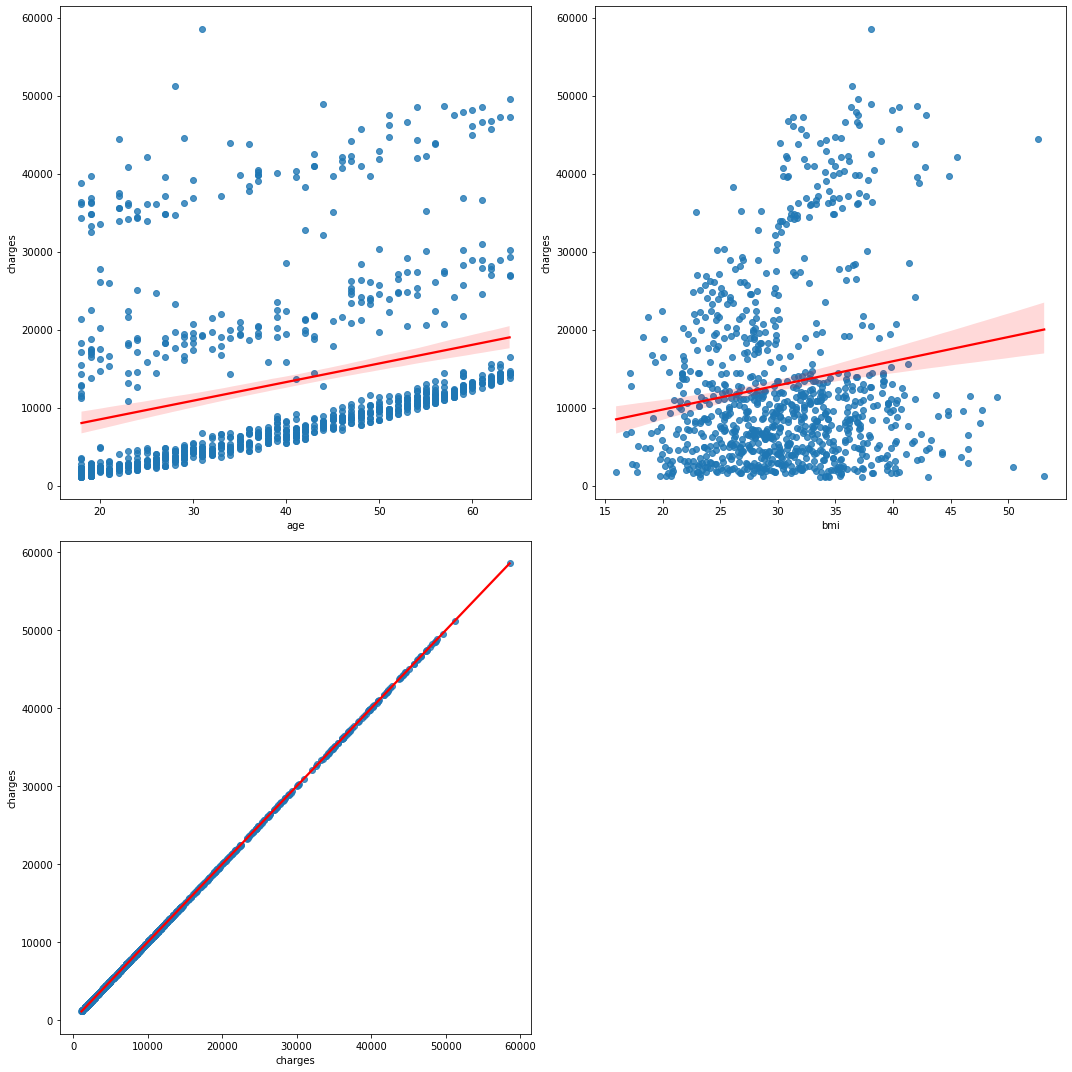

In [80]:
plt.figure(figsize=(15,15))
for x in range(0,len(num)):
    plt.subplot(2,2,x+1)
    sns.regplot(data=dftrain, x=dftrain[num[x]], y='charges', line_kws={'color':'red'})
plt.tight_layout()

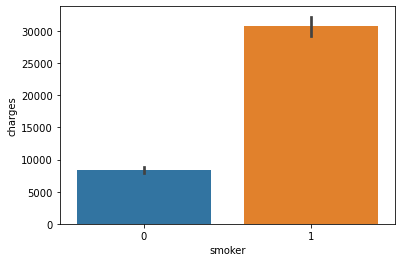

In [81]:
sns.barplot(data=dftrain, x='smoker', y='charges')
plt.show()

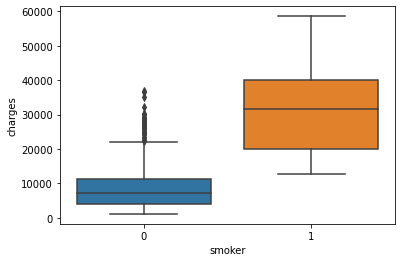

In [82]:
sns.boxplot(data=dftrain, x='smoker', y='charges')
plt.show()

In [83]:
dftrain.groupby('smoker').agg({'charges' : [len, 'mean']})

charges              
           len          mean
smoker                      
0          741   8407.907285
1          194  30708.903177

In [84]:
30708.903177/8407.907285

3.6523836593424095

In [85]:
dftrain.groupby('smoker')['age'].mean()

smoker
0    39.344130
1    37.731959
Name: age, dtype: float64

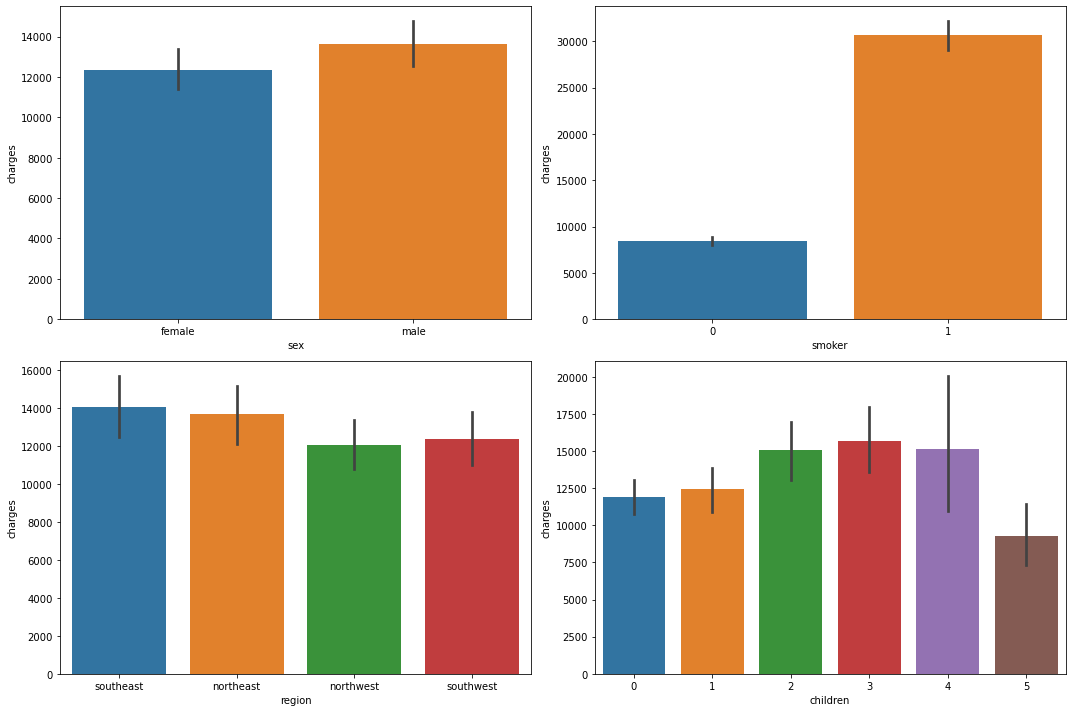

In [86]:
plt.figure(figsize=(15,10))
for x in range(0,len(obj)):
    plt.subplot(2,2,x+1)
    sns.barplot(data=dftrain, x=dftrain[obj[x]], y='charges')
plt.tight_layout()

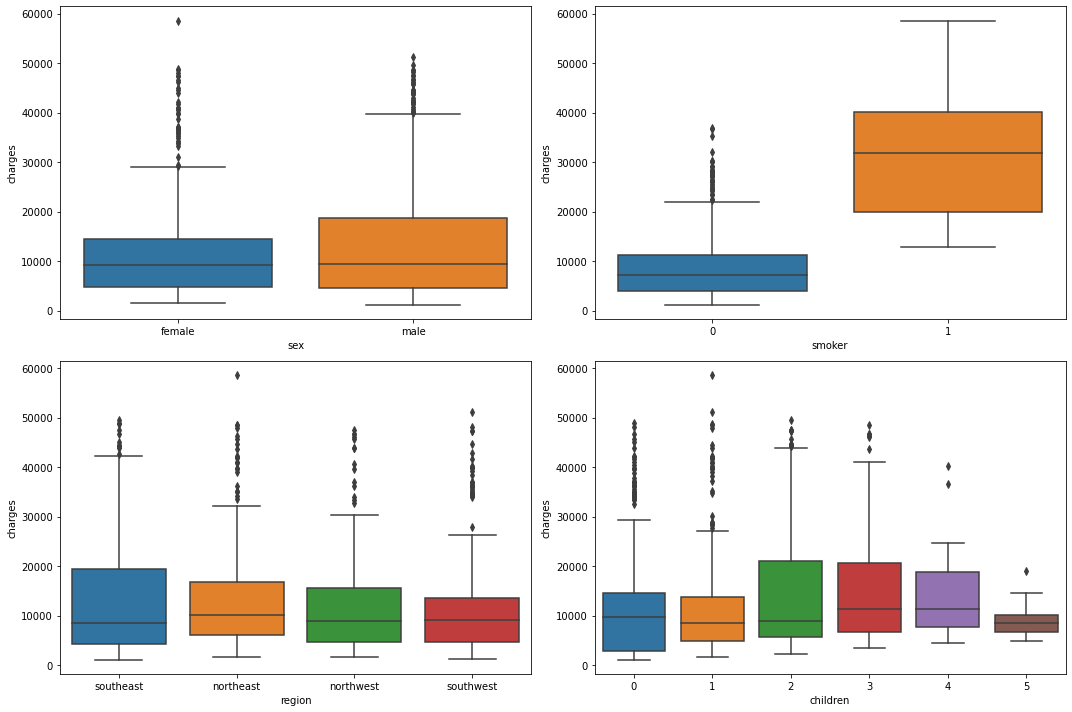

In [87]:
plt.figure(figsize=(15,10))
for x in range(0,len(obj)):
    plt.subplot(2,2,x+1)
    sns.boxplot(data=dftrain, x=dftrain[obj[x]], y='charges')
plt.tight_layout()

## multivariate

### radar plot
### polinomialregressor (machine learning)


In [88]:
dftrain.groupby(['sex', 'smoker']).agg({'charges' : [len, 'mean']})

charges              
                  len          mean
sex    smoker                      
female 0          366   8747.602442
       1           80  28909.120298
male   0          375   8076.364812
       1          114  31971.908706

In [89]:
dftrain.groupby(['region', 'smoker']).agg({'charges' : [len, 'mean']})

charges              
                     len          mean
region    smoker                      
northeast 0          169   9045.371549
          1           49  29577.502289
northwest 0          192   8594.751272
          1           42  27858.012410
southeast 0          191   7955.766716
          1           61  33093.471786
southwest 0          189   8105.014917
          1           42  31416.459620

In [90]:
dftrain.groupby(['sex', 'smoker']).agg({'bmi': ['mean'],
                                  'charges' : ['mean']})

bmi       charges
                    mean          mean
sex    smoker                         
female 0       30.712350   8747.602442
       1       28.628688  28909.120298
male   0       30.780933   8076.364812
       1       31.187807  31971.908706

In [91]:
dftrain.groupby(['region']).agg({'bmi': ['mean'],
                                  'charges' : ['mean']})

,bmi,charges
,mean,mean
region,,
northeast,28.979794,13660.391761
northwest,29.268120,12052.259681
southeast,33.254921,14040.687388
southwest,30.661039,12343.459408


# Data preprocessing

### transform to normal dist

In [92]:
# distribusi charges (nilai asli)
#sns.kdeplot(df['charges'])

In [93]:
# distribusi charge (setelah log transformation)
#sns.kdeplot(np.log(df['charges']))

In [94]:
# maka kita transform
#df['log_charge'] = np.log(df['charges'])
#df = df.drop(columns = 'charges')
#df.head(3)

### handling outliers using zscore method

In [95]:
#nums_updated = ['age','bmi','log_charge']

In [96]:
#from scipy import stats

#print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

#filtered_entries = np.array([True] * len(df))

#for col in nums_updated:
    #zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    #filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
#df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

#print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

### handling categoric (encoding)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [98]:
for col in df:
    print(f'unique value from {col}:')
    print(f'{df[col].unique()}')
    print('xx'*40)

unique value from age:
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
unique value from sex:
['female' 'male']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
unique value from bmi:
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98 

##### label encoding

In [99]:
dftrain['smoker'] = dftrain['smoker'].replace(['yes', 'no'], [1,0])
dftrain['sex'] = dftrain['sex'].replace(['male', 'female'], [1,0])

dftest['smoker'] = dftest['smoker'].replace(['yes', 'no'], [1,0])
dftest['sex'] = dftest['sex'].replace(['male', 'female'], [1,0])

#### one hot encoding

In [100]:
#df = df.drop(columns = ['region'])
dummies6 = pd.get_dummies(dftrain['region'],prefix="region")
dftrain = pd.concat([dftrain,dummies6],axis=1)
dftrain = dftrain.drop(['region', 'region_northeast'],axis=1)

dummies7 = pd.get_dummies(dftest['region'],prefix="region")
dftest = pd.concat([dftest,dummies7],axis=1)
dftest = dftest.drop(['region', 'region_northeast'],axis=1)

In [101]:
print (dftrain.head(2))

print (dftest.head(2))

     age  sex     bmi  children  smoker      charges  region_northwest  \
138   54    0  31.900         3       0  27322.73386                 0   
381   55    1  30.685         0       1  42303.69215                 0   

     region_southeast  region_southwest  
138                 1                 0  
381                 0                 0  
      age  sex     bmi  children  smoker     charges  region_northwest  \
900    49    1  22.515         0       0  8688.85885                 0   
1064   29    0  25.600         4       0  5708.86700                 0   

      region_southeast  region_southwest  
900                  0                 0  
1064                 0                 1  


<AxesSubplot:xlabel='charges', ylabel='Count'>

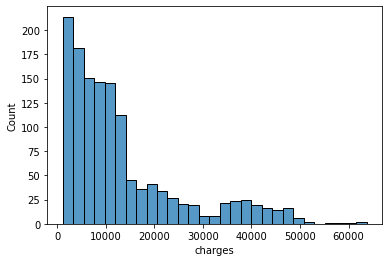

In [102]:
sns.histplot(data=df, x='charges')

<AxesSubplot:xlabel='charges', ylabel='Count'>

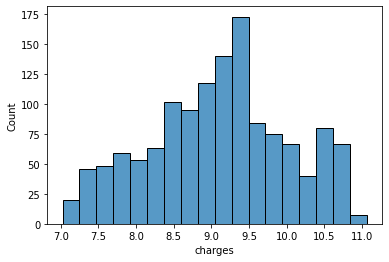

In [103]:
sns.histplot(data=df, x=np.log(df['charges']))

In [104]:
nums = ['charges', 'bmi']

In [105]:
#Outliers Handling capping methods

def capping_outliers(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return(x)

In [106]:
dftrain[nums] = dftrain[nums].apply(capping_outliers)
#dftest[nums] = dftest[nums].apply(capping_outliers)

In [107]:
#from scipy import stats

#print(f'Jumlah baris sebelum memfilter outlier: {len(dftrain)}')

#filtered_entries = np.array([True] * len(dftrain))

#for col in nums:
    #zscore = abs(stats.zscore(dftrain[col])) # hitung absolute z-scorenya
    #filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
#dftrain = dftrain[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

#print(f'Jumlah baris setelah memfilter outlier: {len(dftrain)}')

In [108]:
#from scipy import stats

#print(f'Jumlah baris sebelum memfilter outlier: {len(dftest)}')

#filtered_entries = np.array([True] * len(dftest))

#for col in nums:
    #zscore = abs(stats.zscore(dftest[col])) # hitung absolute z-scorenya
    #filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
#dftest = dftest[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

#print(f'Jumlah baris setelah memfilter outlier: {len(dftest)}')

<AxesSubplot:xlabel='charges', ylabel='Count'>

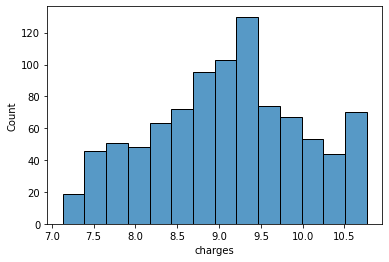

In [109]:
sns.histplot(data=dftrain, x=np.log(dftrain['charges']))

<AxesSubplot:xlabel='charges', ylabel='Count'>

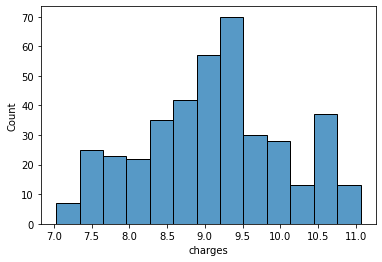

In [110]:
sns.histplot(data=dftest, x=np.log(dftest['charges']))

In [111]:
dftrain['charges'] = np.log(dftrain['charges'])
dftest['charges'] = np.log(dftest['charges'])

<AxesSubplot:>

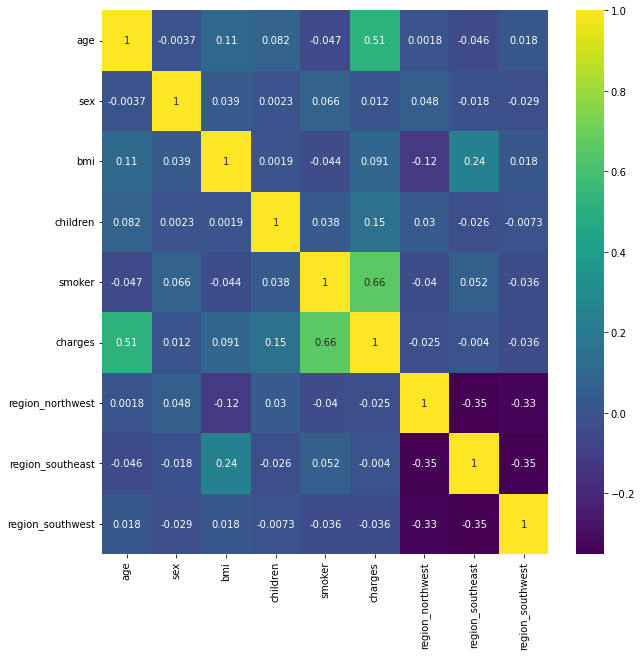

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(dftrain.corr(method='spearman'),annot=True,cmap='viridis',fmt='.2g')

there is no multicolinearity and there is no small correlation with target, so we dont have to drop the feature

### scalling

In [113]:
nums_var = ['age', 'bmi', 'children', 'charges']

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dftrain[nums_var] = scaler.fit_transform(dftrain[nums_var])
dftest[nums_var] = scaler.transform(dftest[nums_var])

In [115]:
print(dftrain.head(2))

print(dftest.head(2))

          age  sex       bmi  children  smoker   charges  region_northwest  \
138  1.071358    0  0.218498  1.599870       0  1.239787                 0   
381  1.142828    1  0.013359 -0.905789       1  1.721657                 0   

     region_southeast  region_southwest  
138                 1                 0  
381                 0                 0  
           age  sex       bmi  children  smoker   charges  region_northwest  \
900   0.714009    1 -1.366049 -0.905789       0 -0.023079                 0   
1064 -0.715385    0 -0.845183  2.435090       0 -0.486063                 0   

      region_southeast  region_southwest  
900                  0                 0  
1064                 0                 1  


## Machine Learning

In [116]:
#X = df.drop('charges', axis=1)
#y = df['charges']

In [117]:
X_train = dftrain.drop('charges', axis=1)
y_train = dftrain['charges']
X_test = dftest.drop('charges', axis=1)
y_test = dftest['charges']

In [118]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [120]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(935, 8)
(402, 8)
(935,)
(402,)


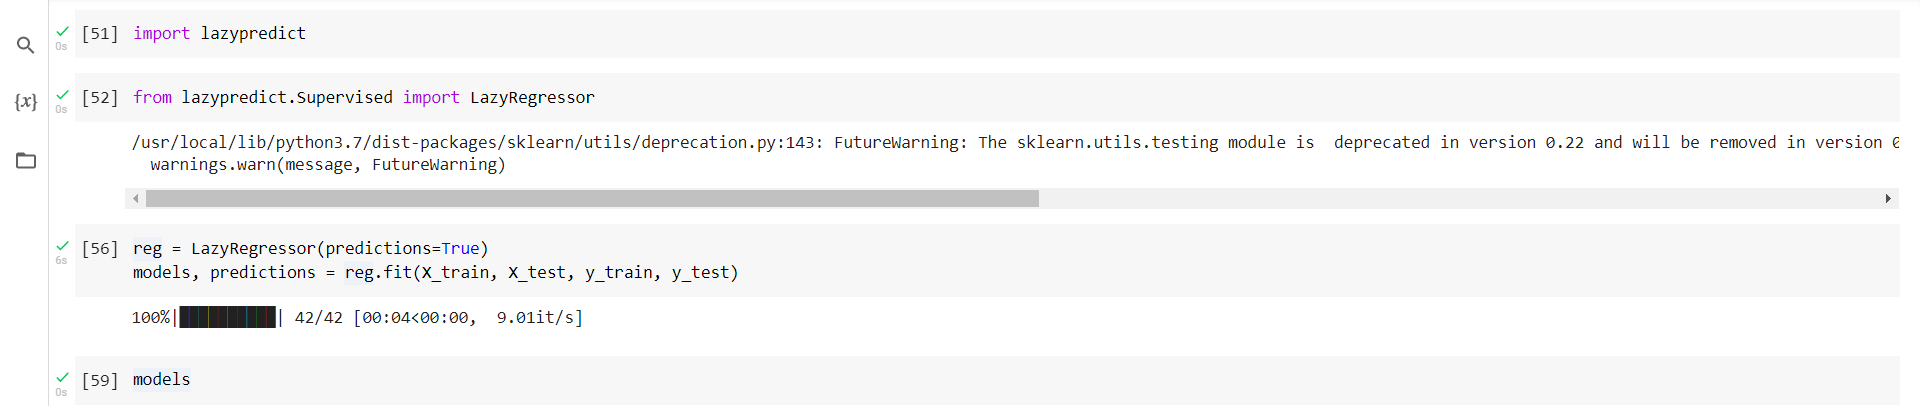

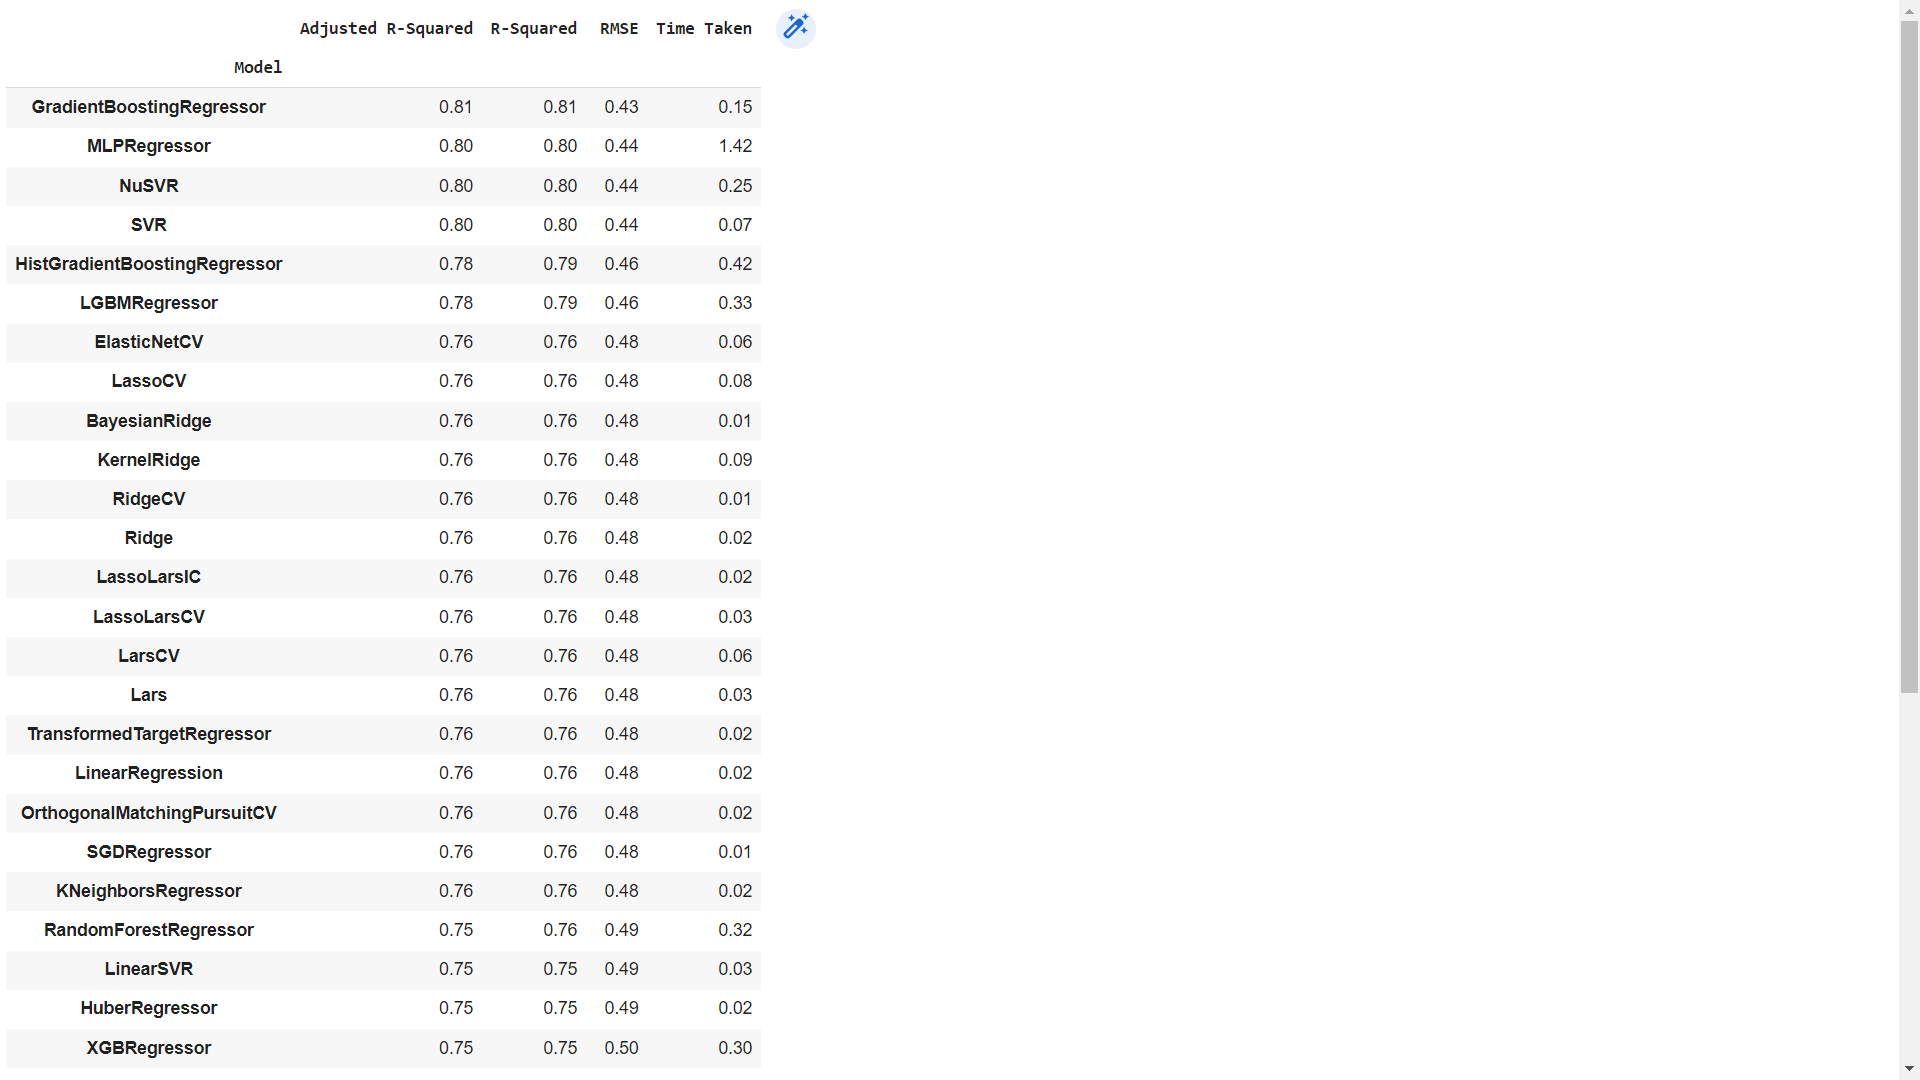

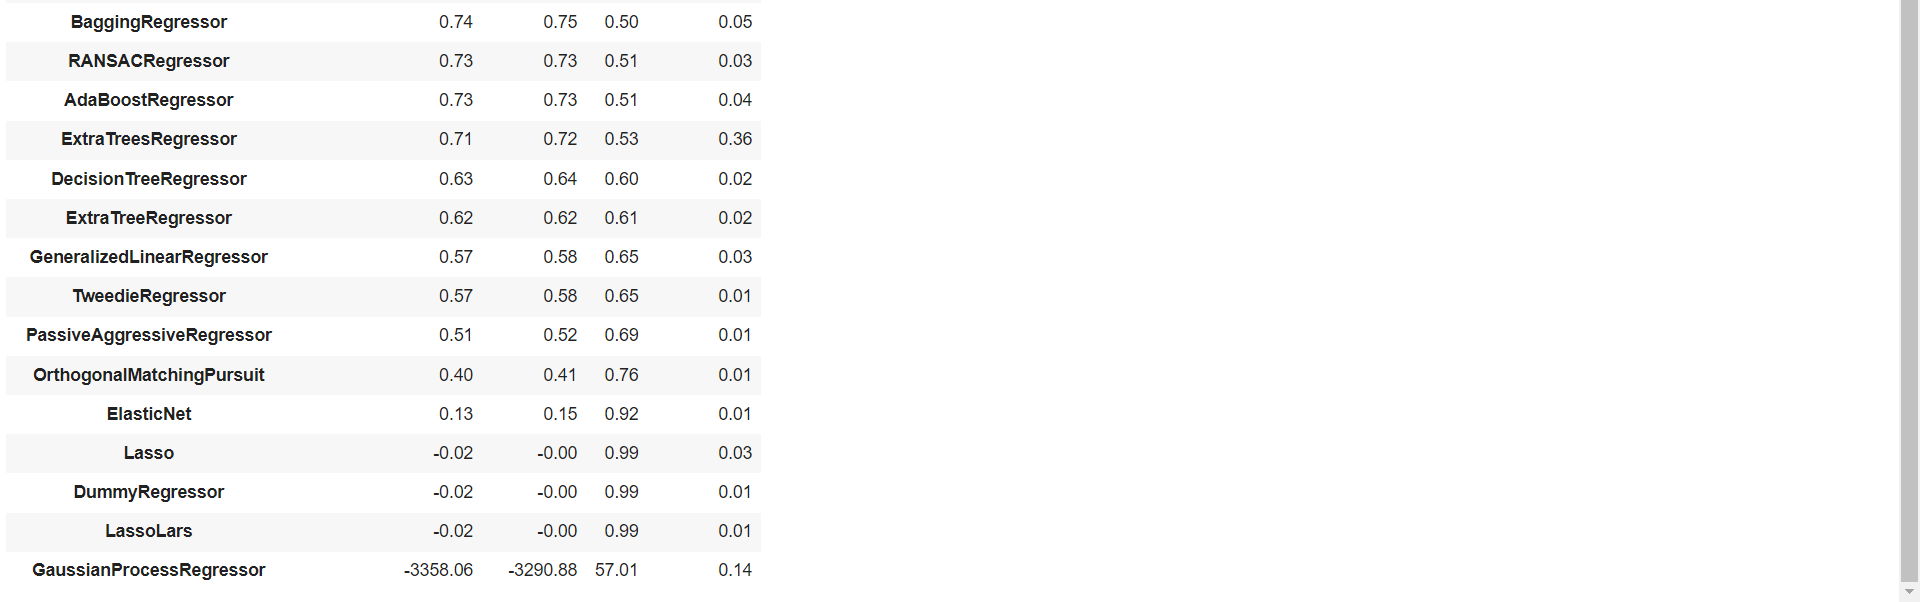

terdapat issue ketika menggunakan lazypredict di jupyter, oleh karena itu running lazypredict di google colabs

# GradientBoostingRegressor

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
gbr = GradientBoostingRegressor()

In [123]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [124]:
#cari hasil training dan testing
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

In [125]:
def eval_regression(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    from sklearn.metrics import mean_squared_error, r2_score
    
    print('rmse (train): '+ str(mean_squared_error(y_train, y_pred_train, squared=False)))
    print('rmse (test): '+ str(mean_squared_error(y_test, y_pred, squared=False)))
    print('r2 (train): '+ str(r2_score(y_train, y_pred_train)))
    print('r2 (test): '+ str(r2_score(y_test, y_pred)))

In [126]:
eval_regression(gbr)

rmse (train): 0.3333800789864192
rmse (test): 0.4082559544575353
r2 (train): 0.888857722935009
r2 (test): 0.8441022653998218


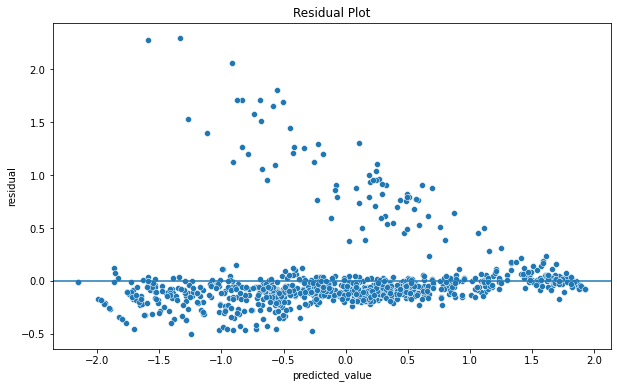

In [127]:
# calculate residuals
residual = y_train - y_train_pred

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_train_pred,
    'residual': residual
})

# residual plot
plt.figure(figsize=(10,6))
plt.title('Residual Plot')
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

<Figure size 720x576 with 0 Axes>

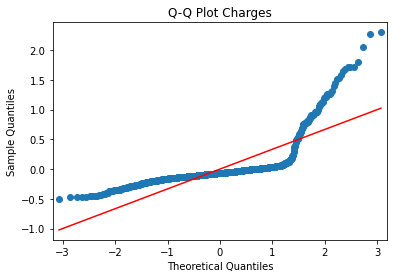

In [128]:
import statsmodels.api as sm
plt.figure(figsize=(10,8))
sm.graphics.qqplot(residual,line="s")
plt.title("Q-Q Plot Charges");
plt.show()

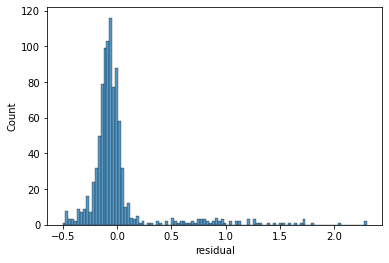

In [129]:
sns.histplot(data=df_resid, x="residual")
plt.show()

# lightgbm

In [130]:
import lightgbm as lgb

In [131]:
lgbm = lgb.LGBMRegressor(random_state=0)
lgbm.fit(X_train,y_train)
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

In [132]:
eval_regression(lgbm)

rmse (train): 0.2619162423055413
rmse (test): 0.43146991501434967
r2 (train): 0.931399882016545
r2 (test): 0.8258691229958506


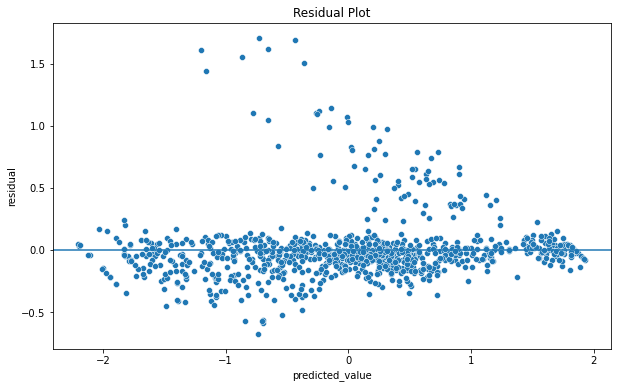

In [133]:
# calculate residuals
residual = y_train - y_train_pred

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_train_pred,
    'residual': residual
})

# residual plot
plt.figure(figsize=(10,6))
plt.title('Residual Plot')
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

<Figure size 720x576 with 0 Axes>

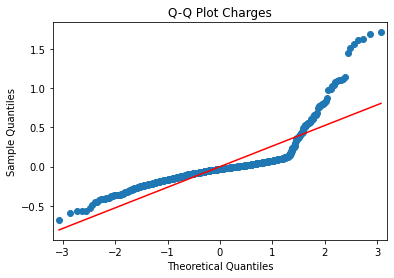

In [134]:
import statsmodels.api as sm
plt.figure(figsize=(10,8))
sm.graphics.qqplot(residual,line="s")
plt.title("Q-Q Plot Charges");

<AxesSubplot:xlabel='residual', ylabel='Count'>

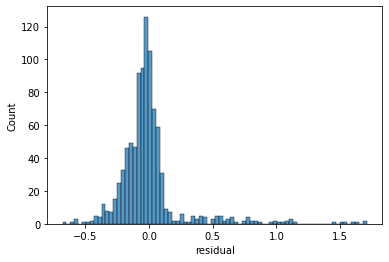

In [135]:
sns.histplot(data=df_resid, x="residual")

# RandomForestRegressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [138]:
eval_regression(rfr)

rmse (train): 0.17082520792206624
rmse (test): 0.4348949823378949
r2 (train): 0.9708187483383829
r2 (test): 0.8230936007724854


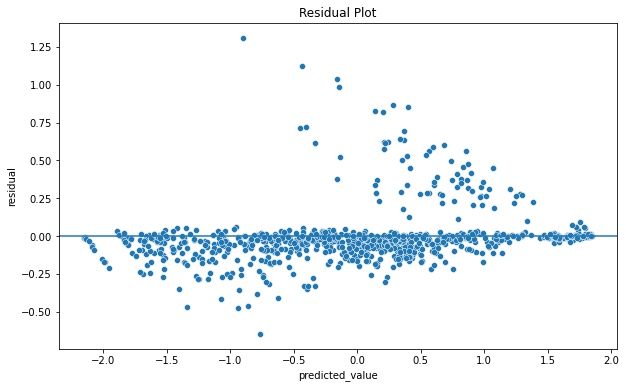

In [139]:
# calculate residuals
residual = y_train - y_train_pred

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_train_pred,
    'residual': residual
})

# residual plot
plt.figure(figsize=(10,6))
plt.title('Residual Plot')
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

<Figure size 720x576 with 0 Axes>

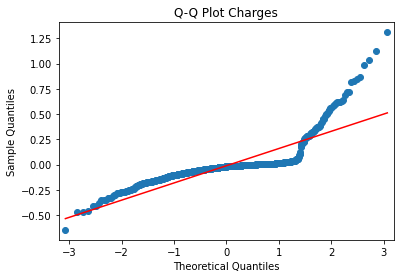

In [140]:
import statsmodels.api as sm
plt.figure(figsize=(10,8))
sm.graphics.qqplot(residual,line="s")
plt.title("Q-Q Plot Charges");

<AxesSubplot:xlabel='residual', ylabel='Count'>

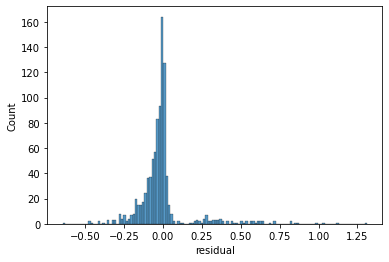

In [141]:
sns.histplot(data=df_resid, x="residual")

# HistGradientBoostingRegressor

In [142]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor()
hgb.fit(X_train,y_train)
y_train_pred = hgb.predict(X_train)
y_test_pred = hgb.predict(X_test)

In [143]:
eval_regression(hgb)

rmse (train): 0.26430701463895856
rmse (test): 0.4205713972091707
r2 (train): 0.9301418020126414
r2 (test): 0.8345547832895334


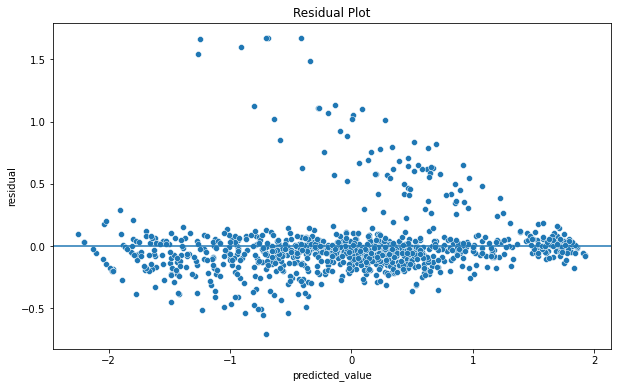

In [144]:
# calculate residuals
residual = y_train - y_train_pred

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_train_pred,
    'residual': residual
})

# residual plot
plt.figure(figsize=(10,6))
plt.title('Residual Plot')
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

<Figure size 720x576 with 0 Axes>

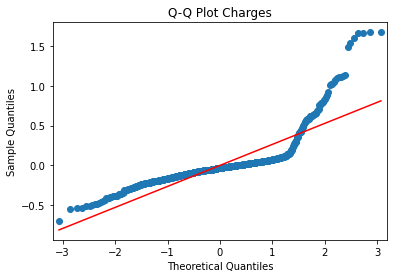

In [145]:
import statsmodels.api as sm
plt.figure(figsize=(10,8))
sm.graphics.qqplot(residual,line="s")
plt.title("Q-Q Plot Charges");

<AxesSubplot:xlabel='residual', ylabel='Count'>

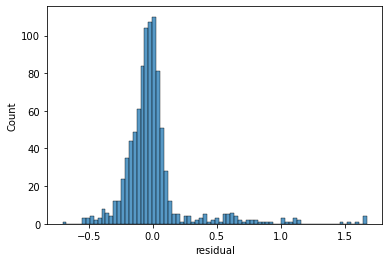

In [146]:
sns.histplot(data=df_resid, x="residual")

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

eval_regression(ridge)

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

eval_regression(lasso)

from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)
y_train_pred = elasticnet.predict(X_train)
y_test_pred = elasticnet.predict(X_test)

eval_regression(elasticnet)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train,y_train)
y_train_pred = elasticnet.predict(X_train)
y_test_pred = elasticnet.predict(X_test)
eval_regression(mlp)